<a href="https://colab.research.google.com/github/LuciferX45/Signal-Image-Processing-Labs/blob/main/SIP_LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIP LAB 5**
# **Gautam Padhi**
# I034 B2
# BTech AI SEM IV


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
img1 = cv2.imread('image1.tif') 
img2 = cv2.imread('image2.tif')
img3 = cv2.imread('image3.tif')
img4 = cv2.imread('image4.png') 
img_list = [img1,img2,img3,img4]

## HISTOGRAM PLOTTING

In [ ]:
def histogram_plotting(img):
  d = {}
  r = img.shape[0]
  c = img.shape[1]

  img_1 = img[:,:,0]

  for i in range(r):
    for j in range(c):
      if (img_1[i][j] in d):
        d[img_1[i][j]]+=1
      else:
        d[img_1[i][j]]=1

  plt.stem(list(d.keys()),list(d.values()))                
  plt.xlabel('intensity value')
  plt.ylabel('number of pixels')

## HISTOGRAM EQUALIZATION

In [ ]:
def histogram(img):
  r=np.arange(0,256, dtype=int)
  c=np.zeros(len(r), dtype=int)
  for k in r:
    c[k]=(img==k).sum()
  return (r,c)

In [ ]:
def histogram_equalization(img):
  
  r,c = histogram(img)

  m,n = img.shape[0],img.shape[1]
  
  pdf= c/(m*n) 
  pdf1= pdf.copy()
  cdf= np.zeros(len(pdf))
  cdf[0]= pdf[0]

  for i in range(1,len(pdf)):
    cdf[i]= cdf[i-1]+pdf1[i]
  
  sk= cdf*255
  sk= sk.astype(int) 

  img_equ= np.zeros((m,n),dtype=int) 
  
  for i in range(m):
    for j in range(n):
      temp = img[i,j]
      img_equ[i,j]= sk[temp][0]

  img_equ=img_equ.astype('int')

  plt.subplot(1,2,1)
  plt.title("Original image")
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,2,2)
  plt.title("Equalized image")
  plt.imshow(img_equ, cmap='gray', vmin=0, vmax=255)

  plt.figure(figsize= (25,5))
  plt.subplot(1,3,1)
  plt.title("Histogram of the original image")
  plt.xlabel("intensity")
  plt.ylabel("frquency of each intensity")
  plt.stem(r,c)
  plt.subplot(1,3,2)
  plt.title("Histogram of the equalized image")
  s,nq= histogram(img_equ)
  plt.plot(s,nq, "-r")
  plt.xlabel("intensity")
  plt.ylabel("frquency of each intensity")
  plt.subplot(1,3,3)
  plt.title("transformation function")
  plt.plot(r,sk, "-g")
  plt.xlabel("intensity in the original image")
  plt.ylabel("intensity in the new image")

## RESULTS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


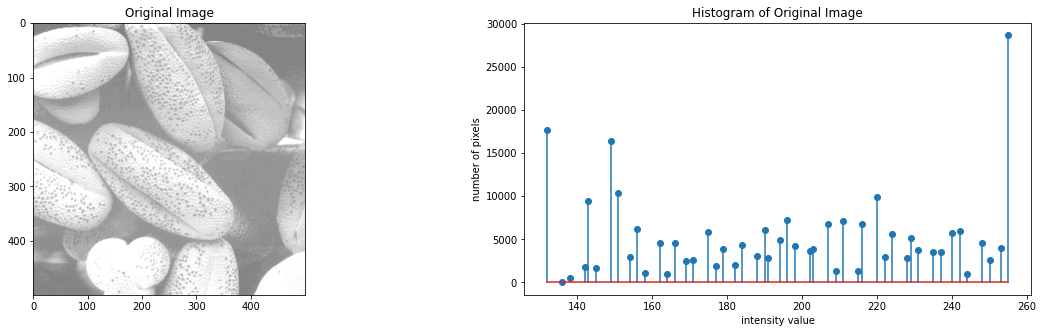

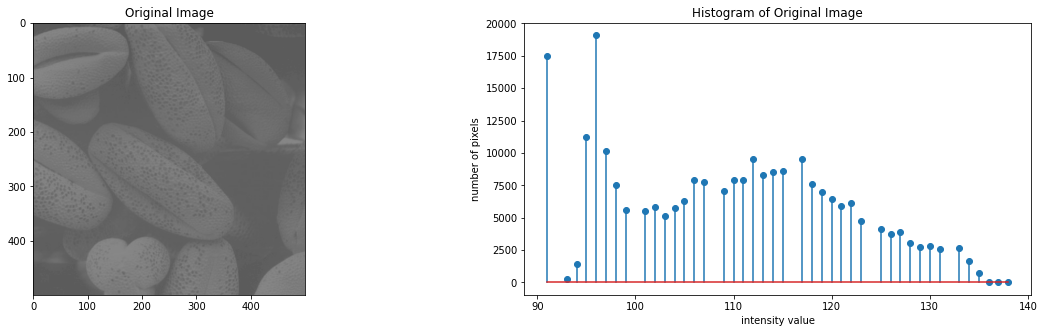

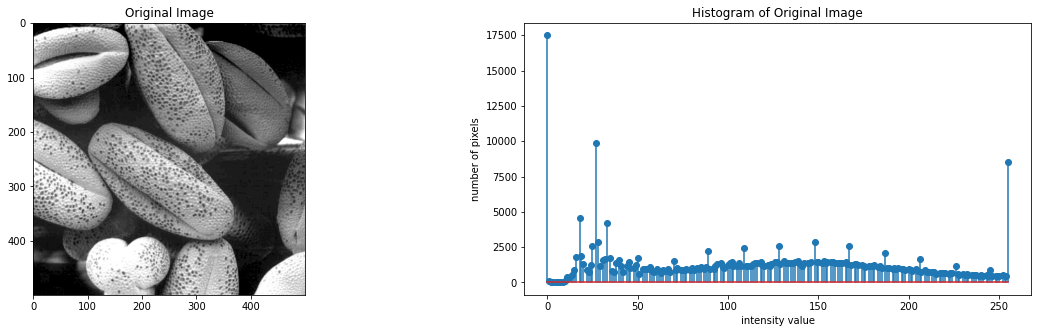

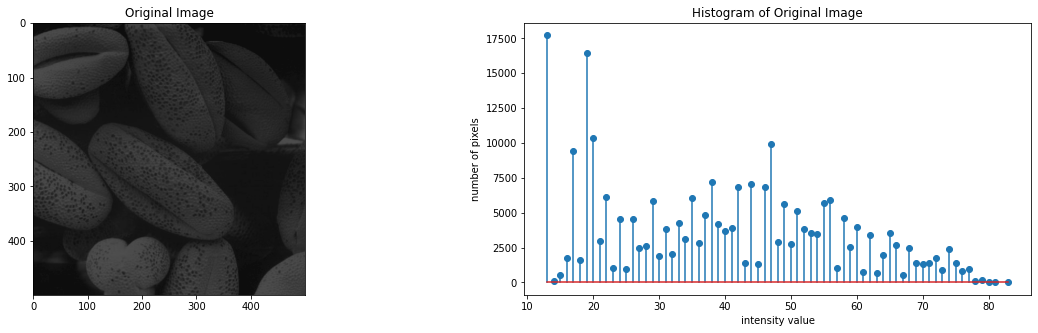

In [ ]:
for i in img_list:
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  plt.title('Original Image')
  plt.imshow(i, cmap="gray", vmin=0, vmax=255)
  plt.subplot(1,2,2)
  plt.title('Histogram of Original Image')
  histogram_plotting(i)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


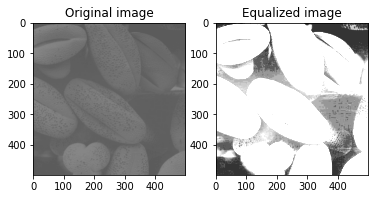

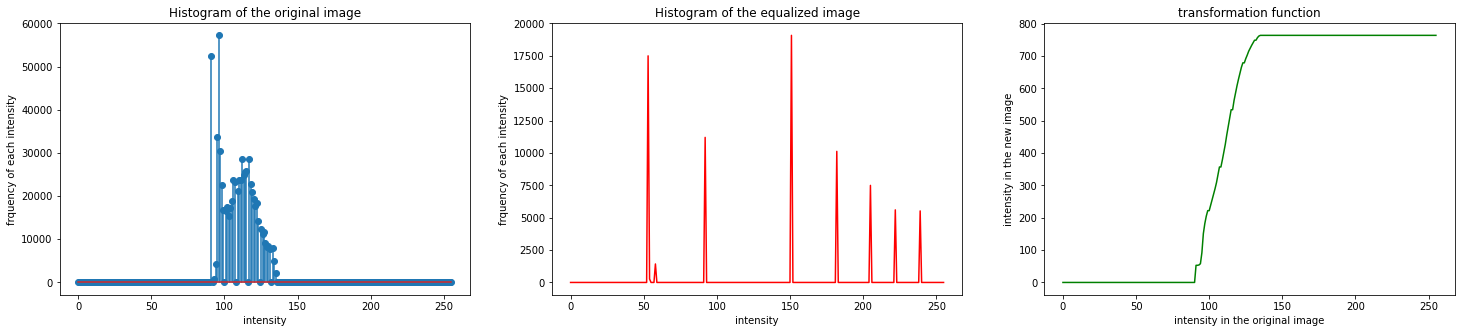

In [ ]:
histogram_equalization(img2)

## **CONCULSION**

We learnt how to plot a histogram of an image and equalise an image without inbuilt functions. 